In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-forecasting-dataset/stores_sales_forecasting.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/kaggle/input/store-sales-forecasting-dataset/stores_sales_forecasting.csv',encoding='latin1')

#  Data Cleaning and Processing

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
# Convert 'Order Date' and 'Ship Date' columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df = df.drop_duplicates()

# Data Visualization


**Sales by Region**

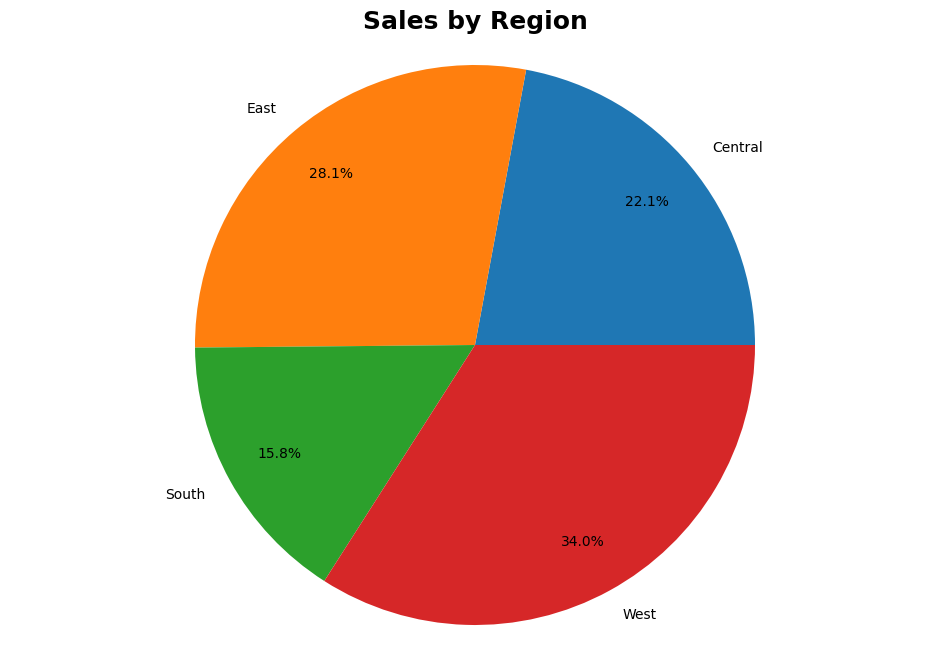

In [9]:
region_sales = df.groupby("Region")["Sales"].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.pie(region_sales["Sales"], labels=region_sales["Region"], autopct="%1.1f%%", pctdistance=0.8)
plt.title("Sales by Region", fontsize=18, fontweight="bold")
plt.axis("equal")
plt.show()

**Sales by Sub-Category**

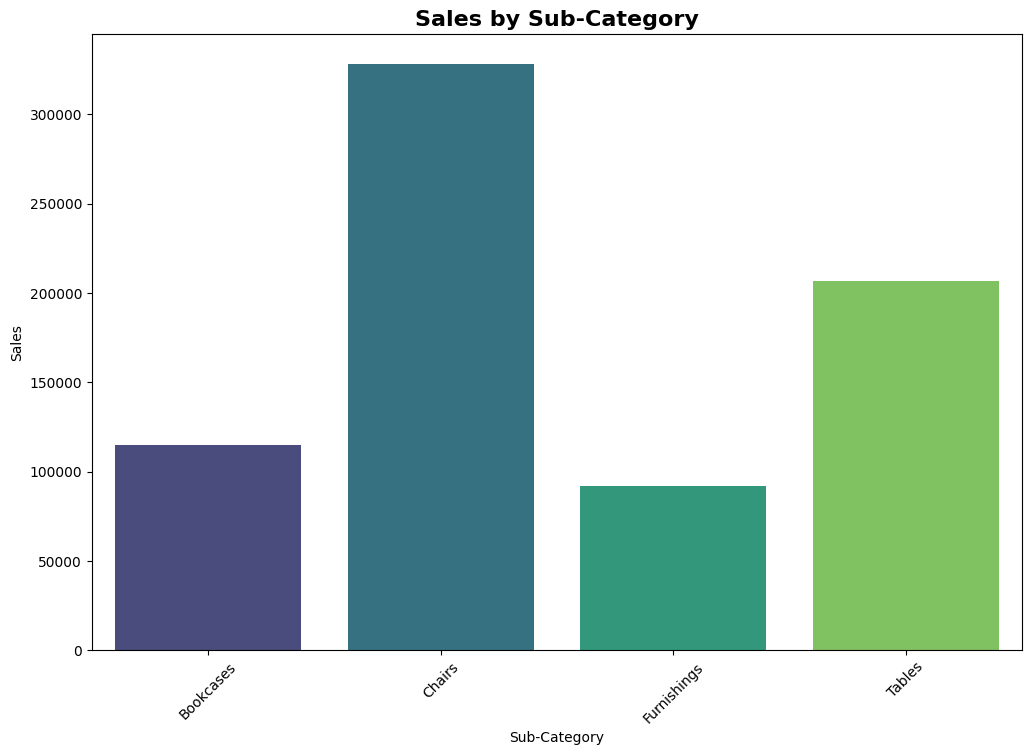

In [10]:
subcategory_sales = df.groupby("Sub-Category")["Sales"].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x="Sub-Category", y="Sales", data=subcategory_sales, palette="viridis")
plt.title("Sales by Sub-Category", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

**Sub-Category vs. Profit**

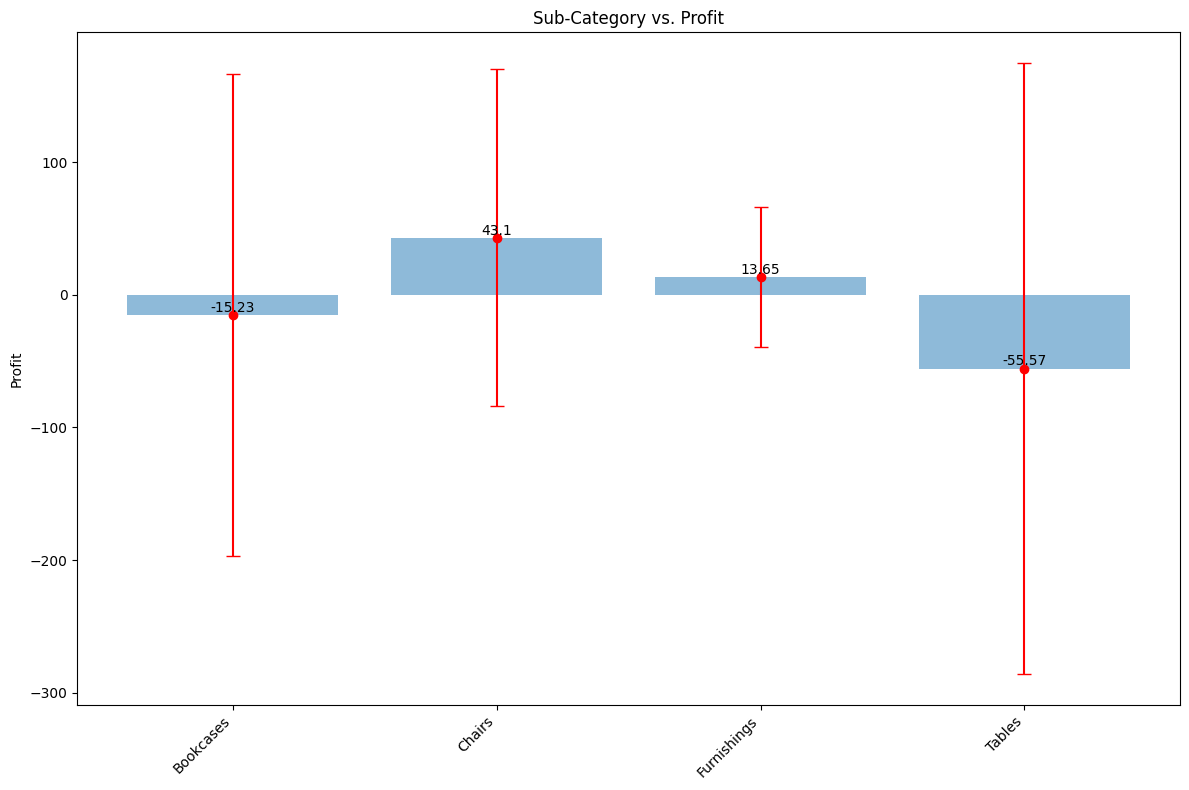

In [11]:
# Calculate the mean profit and standard deviation for each subcategory
subcategory_stats = df.groupby('Sub-Category')['Profit'].agg(['mean', 'std'])
subcategory_stats.columns = ['Mean Profit', 'Std Dev Profit']
subcategory_stats = subcategory_stats.reset_index()

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the mean profit with error bars representing standard deviation
bar_positions = range(len(subcategory_stats['Sub-Category']))
bar_heights = subcategory_stats['Mean Profit']
error_bars = subcategory_stats['Std Dev Profit']

bars = ax.bar(bar_positions, bar_heights, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(bar_positions)
ax.set_xticklabels(subcategory_stats['Sub-Category'], rotation=45, ha='right')
ax.set_ylabel('Profit')
ax.set_title('Sub-Category vs. Profit')

# Add error bars
plt.errorbar(bar_positions, bar_heights, yerr=error_bars, fmt='o', color='red', capsize=5)

# Add value labels
for bar, height in zip(bars, bar_heights):
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.1, str(round(height, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Delivery Time vs. Profit**

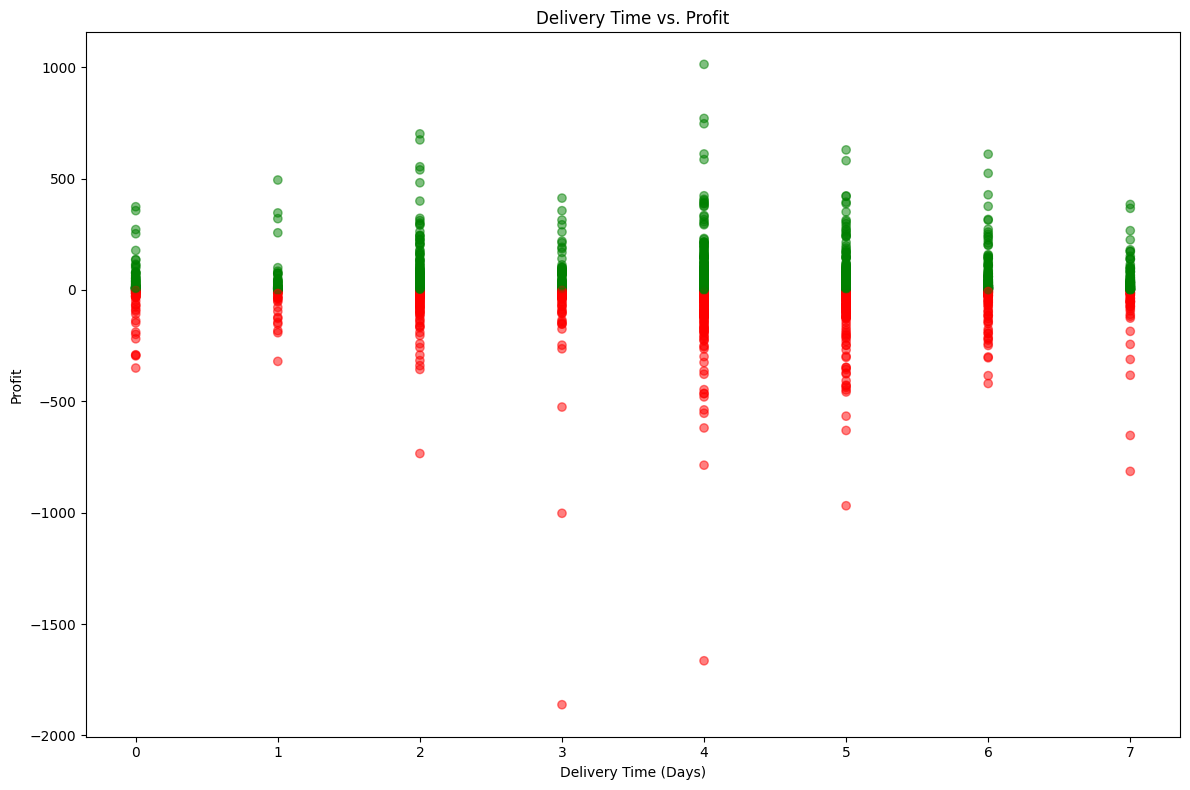

In [12]:
# Calculate the delivery time (Ship Date - Order Date)
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Define colors based on profit
colors = ['red' if profit < 0 else 'green' for profit in df['Profit']]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the delivery time vs. profit with defined colors
ax.scatter(df['Delivery Time'], df['Profit'], alpha=0.5, c=colors)
ax.set_xlabel('Delivery Time (Days)')
ax.set_ylabel('Profit')
ax.set_title('Delivery Time vs. Profit')

plt.tight_layout()
plt.show()

**Sales vs. Profit**

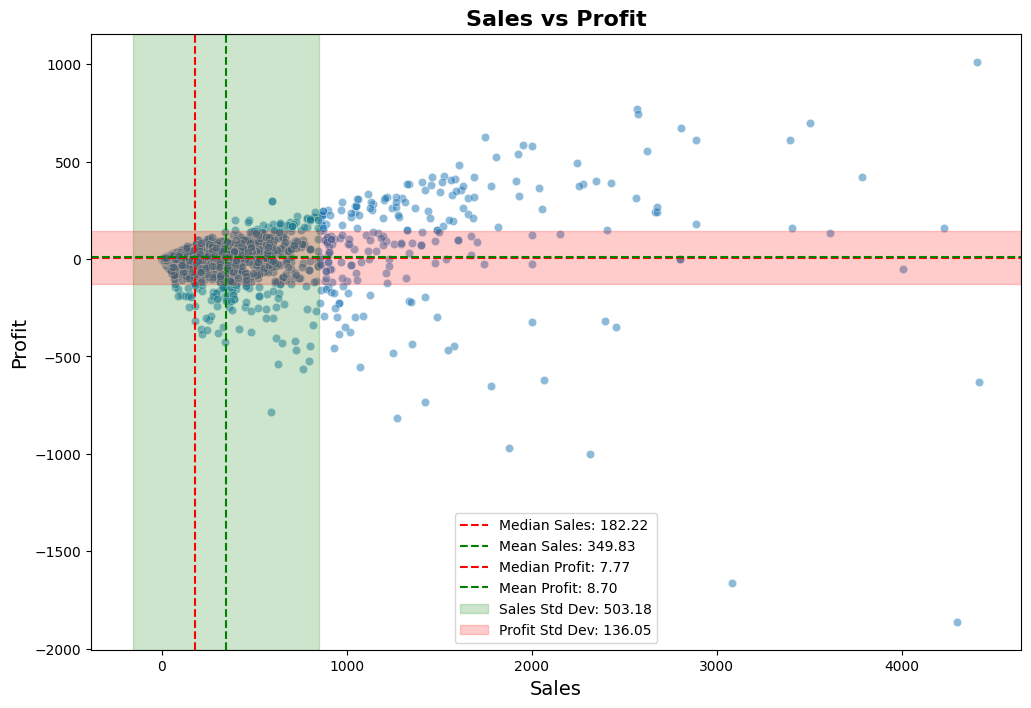

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Sales", y="Profit", data=df, alpha=0.5)

# Calculate median, mean, and standard deviation
sales_median = df["Sales"].median()
sales_mean = df["Sales"].mean()
sales_std = df["Sales"].std()

profit_median = df["Profit"].median()
profit_mean = df["Profit"].mean()
profit_std = df["Profit"].std()

# Add median, mean, and standard deviation lines
plt.axvline(sales_median, color='r', linestyle='--', label=f'Median Sales: {sales_median:.2f}')
plt.axvline(sales_mean, color='g', linestyle='--', label=f'Mean Sales: {sales_mean:.2f}')
plt.axhline(profit_median, color='r', linestyle='--', label=f'Median Profit: {profit_median:.2f}')
plt.axhline(profit_mean, color='g', linestyle='--', label=f'Mean Profit: {profit_mean:.2f}')

# Add shaded regions for standard deviations
plt.axvspan(sales_mean - sales_std, sales_mean + sales_std, alpha=0.2, color='green', label=f'Sales Std Dev: {sales_std:.2f}')
plt.axhspan(profit_mean - profit_std, profit_mean + profit_std, alpha=0.2, color='red', label=f'Profit Std Dev: {profit_std:.2f}')

plt.title("Sales vs Profit", fontsize=16, fontweight="bold")
plt.xlabel("Sales", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.legend()
plt.show()